In [15]:
from utils import load_series_dfs
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import os

In [2]:
series_dfs = load_series_dfs(data_dir='C:/Users/johan/Documents/FH_Master/data')

In [6]:
series_dfs.keys()

dict_keys(['FL_00024702.PLAN.MengeHH', 'FL_00024730.PLAN.MengeHH', 'FL_00352243.PLAN.MengeHH', 'FL_00352244.PLAN.MengeGA', 'FL_00352244.PLAN.MengeKW', 'FL_00024360.PLAN.MengeGA', 'FL_00352254.PLAN.MengeGA', 'FL_00025248.PLAN.MengeGA', 'FL_00024360.PLAN.MengeHH.2', 'FL_00024731.PLAN.MengeHH', 'FL_00024735.PLAN.MengeHH', 'FL_00024667.PLAN.MengeHH', 'FL_00352218.PLAN.MengeHH', 'FL_00025240.PLAN.MengeHH', 'FL_00025241.PLAN.MengeHH', 'FL_00020896.PLAN.MengeHH', 'FL_00342704.PLAN.MengeGA', 'FL_00352054.PLAN.MengeHH', 'CV_00348266.PLAN.Menge', 'FL_00352254.PLAN.MengeHH', 'FL_00352244.PLAN.MengeHH', 'FL_00342704.PLAN.MengeHH', 'CV_00003083.PLAN.Menge', 'CV_00003181.PLAN.Menge', 'CV_00003192.PLAN.Menge', 'CV_00003191.PLAN.Menge', 'CV_00003183.PLAN.Menge', 'CV_00001876.PLAN.Menge', 'CV_00003094.PLAN.Menge', 'CV_00003089.PLAN.Menge', 'CV_00007270.PLAN.Menge', 'CV_00007300.PLAN.Menge', 'KN_00001613.PLAN.Menge', 'KN_00000069.PLAN.Menge', 'KN_00000067.PLAN.Menge', 'CV_00007809.PLAN.Menge', 'FL_00352

In [7]:
# Alle Serien-Keys sammeln
keys = list(series_dfs.keys())

# Primary Key jeweils vor dem ersten Punkt
primary_keys = [key.split('.', 1)[0] for key in keys]

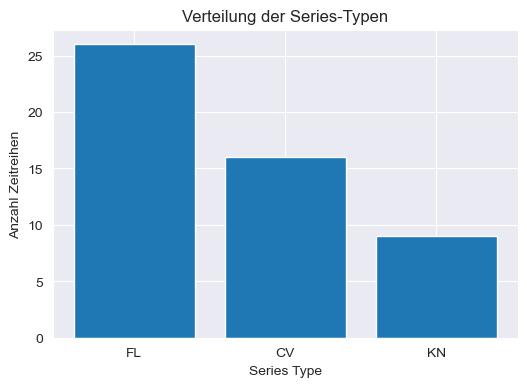

,Anzahl
FL,26
CV,16
KN,9


In [11]:
# 1. Nur die Typen ('FL', 'KN', 'CV') extrahieren
types = [pk[:2] for pk in primary_keys]

# 2. Häufigkeiten zählen
counts = Counter(types)

# 3. Als Balkendiagramm darstellen
plt.figure(figsize=(6,4))
plt.bar(counts.keys(), counts.values())
plt.xlabel('Series Type')
plt.ylabel('Anzahl Zeitreihen')
plt.title('Verteilung der Series-Typen')
plt.show()

# 4. (Optional) Als DataFrame anzeigen
df_counts = pd.DataFrame.from_dict(counts, orient='index', columns=['Anzahl'])
df_counts

In [12]:
identifiers = [key.split('Menge', 1)[1] for key in keys if 'Menge' in key]

# 3. Einzigartige Identifier bestimmen und sortieren
unique_identifiers = sorted(set(identifiers))

# 4. Ausgabe
print("Einzigartige Identifier nach '.Menge':")
for ident in unique_identifiers:
    print(ident)

Einzigartige Identifier nach '.Menge':

.1
GA
HH
HH.2
KW


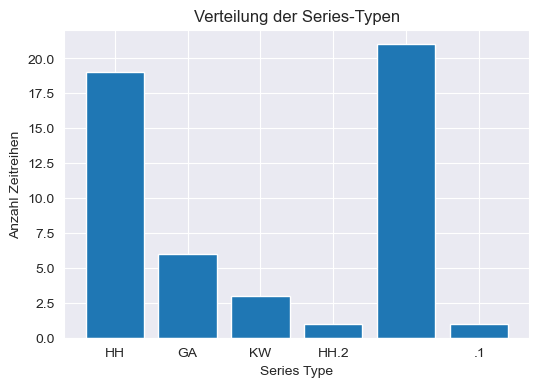

In [13]:
counts_types = Counter(identifiers)

# 3. Als Balkendiagramm darstellen
plt.figure(figsize=(6,4))
plt.bar(counts_types.keys(), counts_types.values())
plt.xlabel('Series Type')
plt.ylabel('Anzahl Zeitreihen')
plt.title('Verteilung der Series-Typen')
plt.show()

In [16]:
csv_path = os.path.join('..', 'data', 'gdm_knoten_202505011242.csv')

# 2. Laden
df_knoten = pd.read_csv(csv_path)
df_knoten.head()

C:\Users\johan\AppData\Local\Temp\ipykernel_4504\374940601.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_knoten = pd.read_csv(csv_path)


,knoten_id,nemesys_key,typ,hoehe,rbhoehe,sichtbk,komm,new_date,mod_date,hydrel,marktgebiet,version_id,geom_g,geom_s1,name,betr
0,1027603,KN_00356986,0.0,612.057,NaN,0.0,NaN,NaN,NaN,1.0,Ost,2011,POINT (355007.375564673 5314385.125350417),NaN,NaN,NaN
1,1042129,KN_00363193,0.0,423.590,NaN,0.0,NaN,NaN,NaN,1.0,Ost,2011,POINT (351554.4231041508 5304750.835706667),NaN,NaN,NaN
2,1042136,KN_00363197,0.0,422.020,NaN,0.0,NaN,NaN,NaN,1.0,Ost,2011,POINT (351506.4519862796 5304625.669871682),NaN,NaN,NaN
3,1042251,KN_00363254,0.0,419.363,NaN,0.0,NaN,NaN,NaN,1.0,Ost,2011,POINT (351320.86953599297 5302767.495058458),NaN,NaN,NaN
4,1042258,KN_00363257,0.0,435.413,NaN,0.0,NaN,NaN,NaN,1.0,Ost,2011,POINT (351705.9977909203 5304631.364126214),NaN,NaN,NaN


In [17]:
csv_path = os.path.join('..', 'data', 'gdm_mengem_202505011301.csv')

# 2. Laden
df_punkte = pd.read_csv(csv_path)
df_punkte.head()

,mengem_id,nemesys_key,name,typ,station_id,betr,nbname,anzms,idm,durchm,...,new_date,mod_date,uebtrag,hydrel,marktgebiet,version_id,geom_g,geom_s1,klarname,h2_anteil
0,996388,CV_00355719,TEst_WebGIS_edit,7,32845,10037.0,Wien,2.0,289.0,NaN,...,2021-12-10 16:05:22.960,2021-12-10 16:05:22.960,1.0,0,Ost,2005,LINESTRING (406803.627076863 5249919.785140501...,NaN,VIE,8.6
1,314199,CV_00003203,NNÖDürn.West2.Q,0,38281,11938.0,NOE.WEST.DUERNROH...FY.MW,0.0,590.0,0.0,...,2021-12-10 16:05:22.961,2021-12-10 16:05:22.961,0.0,0,Ost,2005,"LINESTRING (568836.266970327 5353561.28787479,...","LINESTRING (531376.180468073 5364547.85353879,...",NaN,NaN
2,34736,CV_00001904,OÖFSS311.HDL031.Q,0,33600,12008.0,OOE.VN.LGWTURBI.AS026..FY_GA.MW,0.0,NaN,0.0,...,2021-12-10 16:05:22.961,2021-12-10 16:05:22.961,0.0,0,Ost,2005,"LINESTRING (450596.590552117 5345185.83351994,...","LINESTRING (462474.277553419 5345659.32920793,...",NaN,NaN
3,34739,CV_00007908,OÖFSS312.HDL031.Q,0,33548,12008.0,OOE.VN.VOESTGT.AS152..FY_GA.MW,0.0,NaN,0.0,...,2021-12-10 16:05:22.961,2021-12-10 16:05:22.961,0.0,0,Ost,2005,"LINESTRING (449404.305353361 5347883.3247626, ...","LINESTRING (463340.951379113 5352214.90522529,...",NaN,NaN
4,627087,CV_00346063,LGVRugg.DRMRugg.Q\r\n,0,626972,10109.0,NaN,0.0,262.0,5.0,...,2021-12-10 16:05:22.961,2021-12-10 16:05:22.961,0.0,0,Liechtenstein,2005,"LINESTRING (85828.8911295151 5247432.35926299,...","LINESTRING (85828.8911295151 5247432.35926299,...",NaN,NaN


In [19]:
csv_path = os.path.join('..', 'data', 'gdm_plzg_202505011256.csv')

# 2. Laden
df_flaechen = pd.read_csv(csv_path)
df_flaechen.head()

,plzg_id,nemesys_key,name,plz,komm,new_date,mod_date,verbz_id,geom_g
0,932632,FL_00015626,Wien,1010,Wien,NaN,NaN,859304,"POLYGON ((600759.2143839339 5341026.776277251,..."
1,932633,FL_00015627,Wien,1020,Wien,NaN,NaN,859304,"POLYGON ((601556.5896192855 5342213.639325384,..."
2,932637,FL_00015631,Wien,1060,Wien,NaN,NaN,859304,"POLYGON ((601502.8882447021 5339402.488986059,..."
3,932634,FL_00015628,Wien,1030,Wien,NaN,NaN,859304,"POLYGON ((602883.6809393996 5340719.423630552,..."
4,932635,FL_00015629,Wien,1040,Wien,NaN,NaN,859304,"POLYGON ((602172.9737756528 5339433.474285763,..."


In [21]:
pk_fl = [pk for pk in primary_keys if pk.startswith('FL_')]
pk_kn = [pk for pk in primary_keys if pk.startswith('KN_')]
pk_cv = [pk for pk in primary_keys if pk.startswith('CV_')]


In [22]:
df_fl = df_flaechen.loc[
    df_flaechen['nemesys_key'].isin(pk_fl),
    ['nemesys_key','geom_g']
]
df_fl

,nemesys_key,geom_g


In [23]:
df_kn = df_knoten.loc[
    df_knoten['nemesys_key'].isin(pk_kn),
    ['nemesys_key','geom_g']
]

df_kn

,nemesys_key,geom_g


In [24]:
pk_fl

['FL_00024702',
 'FL_00024730',
 'FL_00352243',
 'FL_00352244',
 'FL_00352244',
 'FL_00024360',
 'FL_00352254',
 'FL_00025248',
 'FL_00024360',
 'FL_00024731',
 'FL_00024735',
 'FL_00024667',
 'FL_00352218',
 'FL_00025240',
 'FL_00025241',
 'FL_00020896',
 'FL_00342704',
 'FL_00352054',
 'FL_00352254',
 'FL_00352244',
 'FL_00342704',
 'FL_00352191',
 'FL_00352189',
 'FL_00352430',
 'FL_00352208',
 'FL_00024616']

In [27]:
df_flaechen[df_flaechen['nemesys_key'] == 'FL_00025240']   #FL_00024731

,plzg_id,nemesys_key,name,plz,komm,new_date,mod_date,verbz_id,geom_g
